In [ ]:
# Trader Behavior vs Market Sentiment Analysis

**Candidate Name:** Siddhi Deshmukh
**Role:** Junior Data Scientist – Trader Behavior Insights

**Google Colab Link:**https://colab.research.google.com/drive/1A0HT43au5dG-IxOOPM_w4WI4L7YU4vPO#scrollTo=rT6Tu4585B3p


## Problem Statement
This analysis explores the relationship between trader behavior on Hyperliquid
and overall Bitcoin market sentiment (Fear vs Greed). The goal is to identify
patterns in profitability, leverage usage, trade volume, and risk-taking behavior
that can inform smarter trading strategies in Web3 markets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [2]:
trader_df= pd.read_csv("/content/historical_data.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
print("Trader Data Shape:", trader_df.shape)
display(trader_df.head())
print("\nSentiment Data Shape:", sentiment_df.shape)
display(sentiment_df.head())

Trader Data Shape: (211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data Shape: (2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
print("Trader Data Missing Values:")
display(trader_df.isna().sum())
print("\nSentiment Data Missing Values:")
display(sentiment_df.isna().sum())

Trader Data Missing Values:


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0



Sentiment Data Missing Values:


,0
timestamp,0
value,0
classification,0
date,0


In [12]:
trader_df.columns = (
    trader_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
print(trader_df.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date']


In [13]:
trader_df['timestamp_ist'] = pd.to_datetime(
    trader_df['timestamp_ist'],
    errors='coerce'
)
trader_df['date'] = trader_df['timestamp_ist'].dt.date
display(trader_df[['timestamp_ist', 'date']].head())

,timestamp_ist,date
0,2024-02-12 22:50:00,2024-02-12
1,2024-02-12 22:50:00,2024-02-12
2,2024-02-12 22:50:00,2024-02-12
3,2024-02-12 22:50:00,2024-02-12
4,2024-02-12 22:50:00,2024-02-12


In [14]:
sentiment_df = sentiment_df[['date', 'classification']]
sentiment_df['classification'] = sentiment_df['classification'].str.capitalize()
sentiment_df['sentiment_binary'] = sentiment_df['classification'].map({
    'Fear': 0,
    'Greed': 1
})
display(sentiment_df.head())


/tmp/ipython-input-2756135433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['classification'] = sentiment_df['classification'].str.capitalize()
/tmp/ipython-input-2756135433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['sentiment_binary'] = sentiment_df['classification'].map({


,date,classification,sentiment_binary
0,2018-02-01,Fear,0.0
1,2018-02-02,Extreme fear,NaN
2,2018-02-03,Fear,0.0
3,2018-02-04,Extreme fear,NaN
4,2018-02-05,Extreme fear,NaN


In [15]:
merged_df = trader_df.merge(
    sentiment_df,
    on='date',
    how='left'
)

print("Merged shape:", merged_df.shape)
display(merged_df.head())

Merged shape: (211224, 19)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,sentiment_binary
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,NaN,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,NaN,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,NaN,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,NaN,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,NaN,NaN


In [16]:
merged_df['is_profitable'] = merged_df['closed_pnl'] > 0

In [17]:
merged_df['trade_volume_usd'] = merged_df['size_usd'].abs()

In [18]:
merged_df['side_binary'] = merged_df['side'].map({'BUY': 1, 'SELL': -1})

In [19]:
import os

os.makedirs("outputs", exist_ok=True)



In [36]:
print("Trader date range:")
print(trader_df['date'].min(), "→", trader_df['date'].max())

print("\nSentiment date range:")
print(sentiment_df['date'].min(), "→", sentiment_df['date'].max())


Trader date range:
2023-01-05 00:00:00 → 2025-12-04 00:00:00

Sentiment date range:
2018-02-01 00:00:00 → 2025-05-02 00:00:00


In [35]:
filtered_df = merged_df[
    (merged_df['date'] >= start_date) &
    (merged_df['date'] <= end_date)
].copy()

print("Filtered shape:", filtered_df.shape)
filtered_df['classification'].value_counts()


Filtered shape: (35864, 20)


,count
classification,
Fear,13869
Greed,11292
Extreme greed,5621
Neutral,2756
Extreme fear,2326


In [37]:
merged_df = trader_df.merge(
    sentiment_df[['merge_date', 'classification', 'sentiment_binary']],
    on='merge_date',
    how='left'
)

print("After re-merge:")
merged_df['classification'].value_counts(dropna=False)


After re-merge:


,count
classification,
NaN,43361
Fear,13869
Greed,11292
Extreme greed,5621
Neutral,2756
Extreme fear,2326


In [32]:
start_date = max(trader_df['merge_date'].min(), sentiment_df['merge_date'].min())
end_date = min(trader_df['merge_date'].max(), sentiment_df['merge_date'].max())

filtered_df = merged_df[
    (merged_df['merge_date'] >= start_date) &
    (merged_df['merge_date'] <= end_date)
].copy()

print("Filtered shape:", filtered_df.shape)
filtered_df['classification'].value_counts()



Filtered shape: (35864, 20)


,count
classification,
Fear,13869
Greed,11292
Extreme greed,5621
Neutral,2756
Extreme fear,2326


In [38]:

filtered_df['classification'] = filtered_df['classification'].str.lower()

def map_sentiment(x):
    if x in ['fear', 'extreme fear']:
        return 'Fear'
    elif x in ['greed', 'extreme greed']:
        return 'Greed'
    else:
        return np.nan

filtered_df['sentiment_final'] = filtered_df['classification'].apply(map_sentiment)

final_df = filtered_df.dropna(subset=['sentiment_final'])

final_df['sentiment_final'].value_counts()


,count
sentiment_final,
Greed,16913
Fear,16195


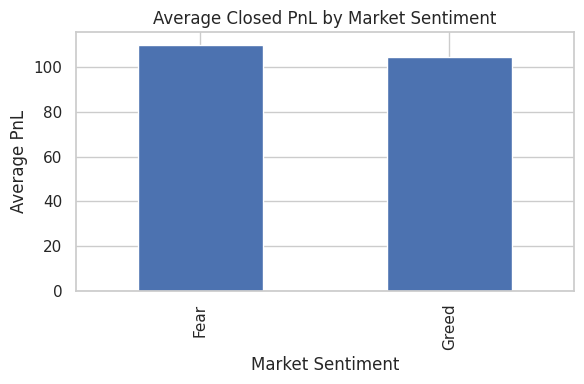

In [39]:
pnl_by_sentiment = final_df.groupby('sentiment_final')['closed_pnl'].mean()

plt.figure(figsize=(6,4))
pnl_by_sentiment.plot(kind='bar')
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.savefig("outputs/avg_pnl_by_sentiment.png", dpi=300)
plt.show()


In [41]:
final_df['is_profitable'] = final_df['closed_pnl'] > 0
final_df[['closed_pnl', 'is_profitable']].head()

/tmp/ipython-input-3360397780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['is_profitable'] = final_df['closed_pnl'] > 0


,closed_pnl,is_profitable
0,0.0,False
1,0.0,False
2,0.0,False
3,0.0,False
4,0.0,False


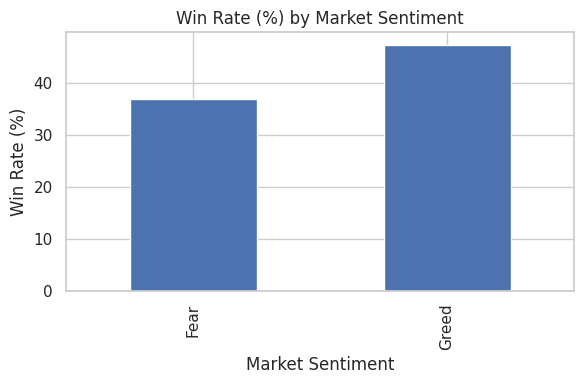

In [44]:
winrate = final_df.groupby('sentiment_final')['is_profitable'].mean() * 100

plt.figure(figsize=(6,4))
winrate.plot(kind='bar')
plt.title("Win Rate (%) by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Market Sentiment")
plt.tight_layout()
plt.savefig("outputs/win_rate_by_sentiment.png", dpi=300)
plt.show()


In [46]:
final_df['trade_volume_usd'] = final_df['size_usd'].abs()
final_df[['size_usd', 'trade_volume_usd']].head()

/tmp/ipython-input-231161008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['trade_volume_usd'] = final_df['size_usd'].abs()


,size_usd,trade_volume_usd
0,7872.16,7872.16
1,127.68,127.68
2,1150.63,1150.63
3,1142.04,1142.04
4,69.75,69.75


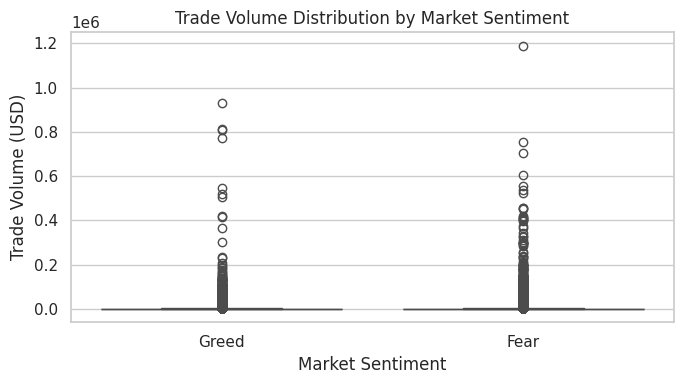

In [47]:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=final_df,
    x='sentiment_final',
    y='trade_volume_usd'
)
plt.title("Trade Volume Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Volume (USD)")
plt.tight_layout()
plt.savefig("outputs/trade_volume_distribution.png", dpi=300)
plt.show()


In [57]:
median_pnl = final_df.groupby('sentiment_final')['closed_pnl'].median()
median_pnl


,closed_pnl
sentiment_final,
Fear,0.0
Greed,0.0


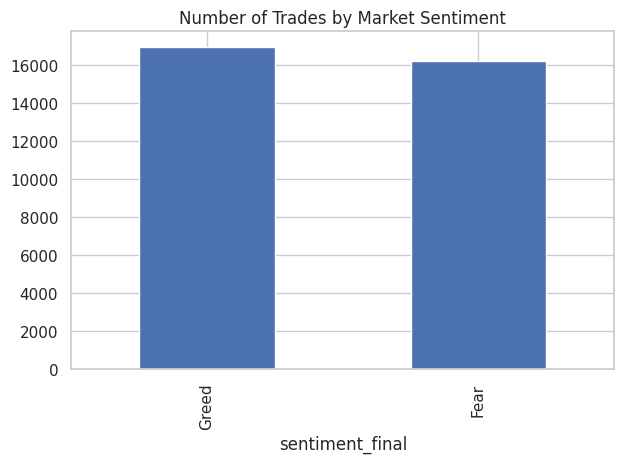

In [59]:
trade_count = final_df['sentiment_final'].value_counts()

trade_count.plot(kind='bar', title='Number of Trades by Market Sentiment')
plt.tight_layout()
plt.savefig("outputs/trade_count_by_sentiment.png", dpi=300)
plt.show()


In [60]:
loss_df = final_df[final_df['closed_pnl'] < 0]

loss_df.groupby('sentiment_final')['closed_pnl'].quantile(0.05)


,closed_pnl
sentiment_final,
Fear,-758.515346
Greed,-1062.276582


In [53]:
import os
os.makedirs("csv_files", exist_ok=True)


In [54]:
final_df.to_csv("csv_files/final_merged_data.csv", index=False)


In [55]:
os.listdir("csv_files")


['final_merged_data.csv']